## Models for Text only

In [67]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import matplotlib as mpl
import re
from gensim import corpora
from textblob import TextBlob
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import f1_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn import decomposition, ensemble
import pandas, xgboost, numpy, textblob, string
from keras.preprocessing import text, sequence
from keras import layers, models, optimizers
import warnings
warnings.filterwarnings("ignore")

import sys
# !{sys.executable} -m spacy download en
import re, numpy as np, pandas as pd
from pprint import pprint

# Gensim
import gensim, spacy, logging, warnings
import gensim.corpora as corpora
from gensim.utils import lemmatize, simple_preprocess
from gensim.models import CoherenceModel
import matplotlib.pyplot as plt

from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn import decomposition, ensemble

import pandas, xgboost, numpy, textblob, string
from keras.preprocessing import text, sequence
from keras import layers, models, optimizers

%matplotlib inline

In [68]:
feature_df = pd.read_csv('cleaned_csv/feature_df.csv',low_memory=False)
print('rows:',len(feature_df))

rows: 239850


In [69]:
feature_df.isnull().sum()

sentiment                         0
cleaned_text                    252
original_word_count               0
original_average_word_length      0
stopword_ratio                    0
dtype: int64

In [70]:
feature_df.dropna(inplace = True)

In [71]:
feature_df.isnull().sum()

sentiment                       0
cleaned_text                    0
original_word_count             0
original_average_word_length    0
stopword_ratio                  0
dtype: int64

In [72]:
feature_df = feature_df.sample(n=5000)

In [73]:
feature_df.sentiment.value_counts()

Neutral    1704
Good       1658
Poor       1638
Name: sentiment, dtype: int64

In [74]:
feature_df.head(1)

,sentiment,cleaned_text,original_word_count,original_average_word_length,stopword_ratio
28499,Neutral,order tomato salad one specialty dip grill bre...,0.185185,0.077224,0.5


In [75]:
y = feature_df["sentiment"]

In [76]:
y

28499     Neutral
163903       Poor
19991     Neutral
134112       Good
112811       Good
           ...   
93369        Good
51515     Neutral
55412     Neutral
189933       Poor
175357       Poor
Name: sentiment, Length: 5000, dtype: object

In [77]:
x = feature_df["cleaned_text"]

In [78]:
x.head(1)

28499    order tomato salad one specialty dip grill bre...
Name: cleaned_text, dtype: object

In [79]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=123)

In [80]:
print("x_train shape: {}".format(x_train.shape), end='\n')
print("y_train shape: {}".format(y_train.shape), end='\n\n')
print("x_test shape: {}".format(x_test.shape), end='\n')
print("y_test shape: {}".format(y_test.shape), end='\n\n')

x_train shape: (4000,)
y_train shape: (4000,)

x_test shape: (1000,)
y_test shape: (1000,)



#### Count Vectors

In [81]:
#Count Vectors as features

In [82]:
# create a count vectorizer object 
count_vect = CountVectorizer(analyzer='word', token_pattern=r'\w{1,}')
count_vect.fit(feature_df['cleaned_text'])

# transform the training and validation data using count vectorizer object
xtrain_count =  count_vect.transform(x_train)
xvalid_count =  count_vect.transform(x_test)

In [83]:
#def run_exps(X_train: pd.DataFrame , y_train: pd.DataFrame, X_test: pd.DataFrame, y_test: pd.DataFrame) -> pd.DataFrame:

    
dfs = []
models = [
        ('LogReg', LogisticRegression()), 
        ('RF', RandomForestClassifier()),
        #('KNN', KNeighborsClassifier()),
        ('SVM', SVC()), 
        ('NB', MultinomialNB()),
        ('XGB', XGBClassifier())
        ]
results = []
names = []
scoring = ['accuracy','f1_macro']
target_names = ['Poor', 'Neutral','Good']

            
        
for name, model in models:
    kfold = model_selection.KFold(n_splits=5, shuffle=True, random_state=123)
    cv_results = model_selection.cross_validate(model, xtrain_count, y_train, cv=kfold, scoring=scoring)
    clf = model.fit(xtrain_count, y_train)
    y_pred = clf.predict(xvalid_count)
    print(name)
    print(classification_report(y_test, y_pred, target_names=target_names,digits=4))

    results.append(cv_results)
    names.append(name)

    this_df = pd.DataFrame(cv_results)
    this_df['model'] = name
    dfs.append(this_df)
    final = pd.concat(dfs, ignore_index=True)
#return final
            


LogReg
              precision    recall  f1-score   support

        Poor     0.9312    0.8185    0.8712       314
     Neutral     0.7692    0.9309    0.8424       333
        Good     0.8536    0.7762    0.8131       353

    accuracy                         0.8410      1000
   macro avg     0.8513    0.8419    0.8422      1000
weighted avg     0.8499    0.8410    0.8411      1000

RF
              precision    recall  f1-score   support

        Poor     0.9141    0.8471    0.8793       314
     Neutral     0.7700    0.9249    0.8404       333
        Good     0.8706    0.7620    0.8127       353

    accuracy                         0.8430      1000
   macro avg     0.8515    0.8447    0.8441      1000
weighted avg     0.8507    0.8430    0.8428      1000

SVM
              precision    recall  f1-score   support

        Poor     0.9620    0.7261    0.8276       314
     Neutral     0.7277    0.8829    0.7978       333
        Good     0.7549    0.7677    0.7612       353

    ac

In [84]:
final

,fit_time,score_time,test_accuracy,test_f1_macro,model
0,0.557583,0.005988,0.84000,0.837374,LogReg
1,0.592389,0.009855,0.83125,0.832116,LogReg
2,0.557927,0.010970,0.83500,0.835713,LogReg
3,0.705888,0.011019,0.82750,0.825645,LogReg
4,0.613116,0.007978,0.84250,0.842098,LogReg
5,5.841432,0.070817,0.84375,0.841151,RF
6,5.339565,0.070811,0.81875,0.819248,RF
7,5.540400,0.067821,0.82875,0.828106,RF
8,5.655605,0.060469,0.83125,0.828928,RF
9,5.367406,0.066091,0.82125,0.820105,RF


In [85]:
bootstraps = []
for model in list(set(final.model.values)):
    model_df = final.loc[final.model == model]
    bootstrap = model_df.sample(n=30, replace=True)
    bootstraps.append(bootstrap)
        
bootstrap_df = pd.concat(bootstraps, ignore_index=True)
results_long = pd.melt(bootstrap_df,id_vars=['model'],var_name='metrics', value_name='values')
time_metrics = ['fit_time','score_time'] # fit time metrics
## PERFORMANCE METRICS
results_long_nofit = results_long.loc[~results_long['metrics'].isin(time_metrics)] # get df without fit data
results_long_nofit = results_long_nofit.sort_values(by='values')
## TIME METRICS
results_long_fit = results_long.loc[results_long['metrics'].isin(time_metrics)] # df with fit data
results_long_fit = results_long_fit.sort_values(by='values')

Text(0.5, 1.0, 'Comparison of Model by Classification Metric')

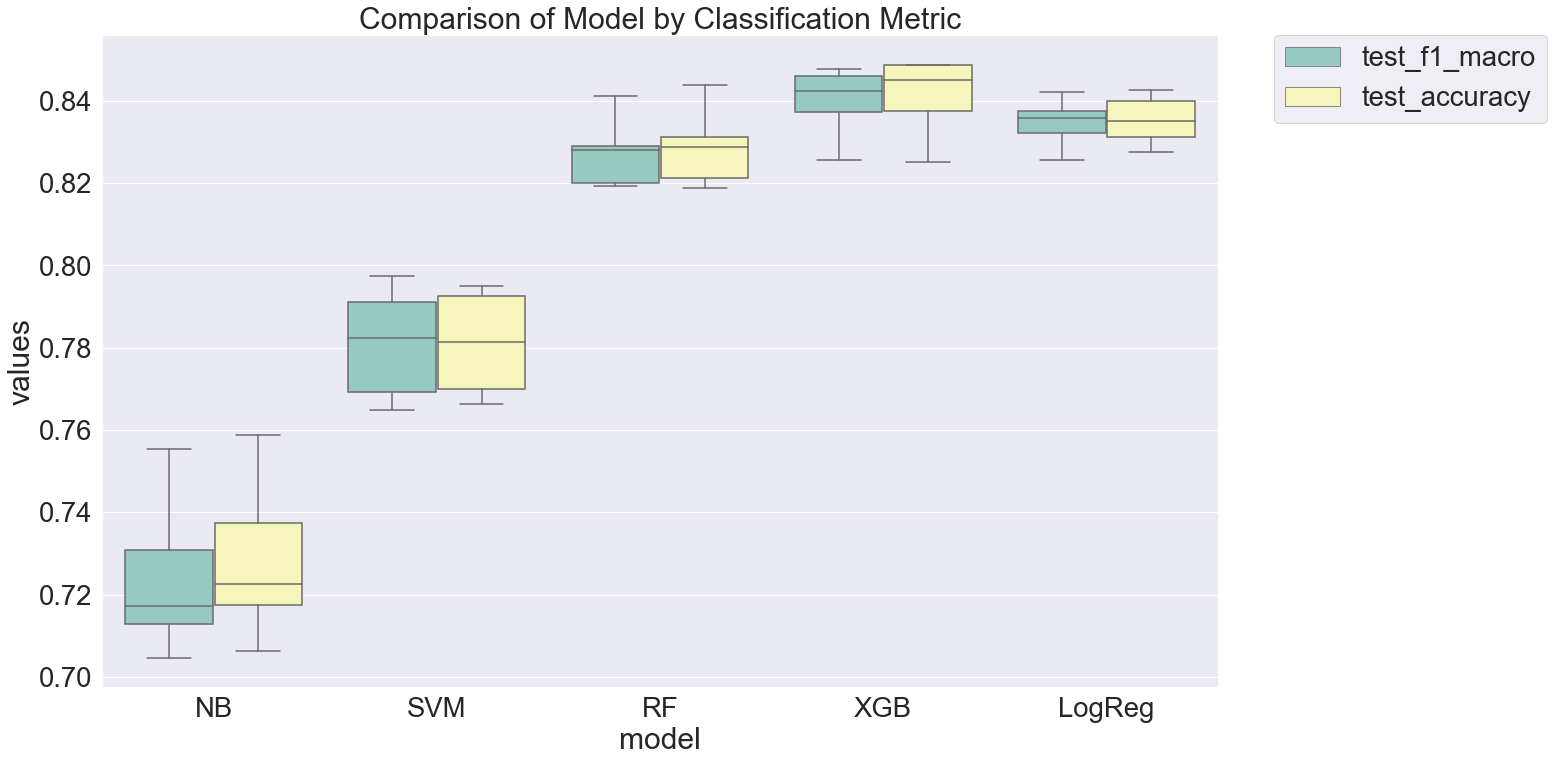

In [86]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(20, 12))
sns.set(font_scale=2.5)
g = sns.boxplot(x="model", y="values", hue="metrics", data=results_long_nofit, palette="Set3")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Comparison of Model by Classification Metric')
#plt.savefig('./benchmark_models_performance.png',dpi=300)

Text(0.5, 1.0, 'Comparison of Model by Fit and Score Time')

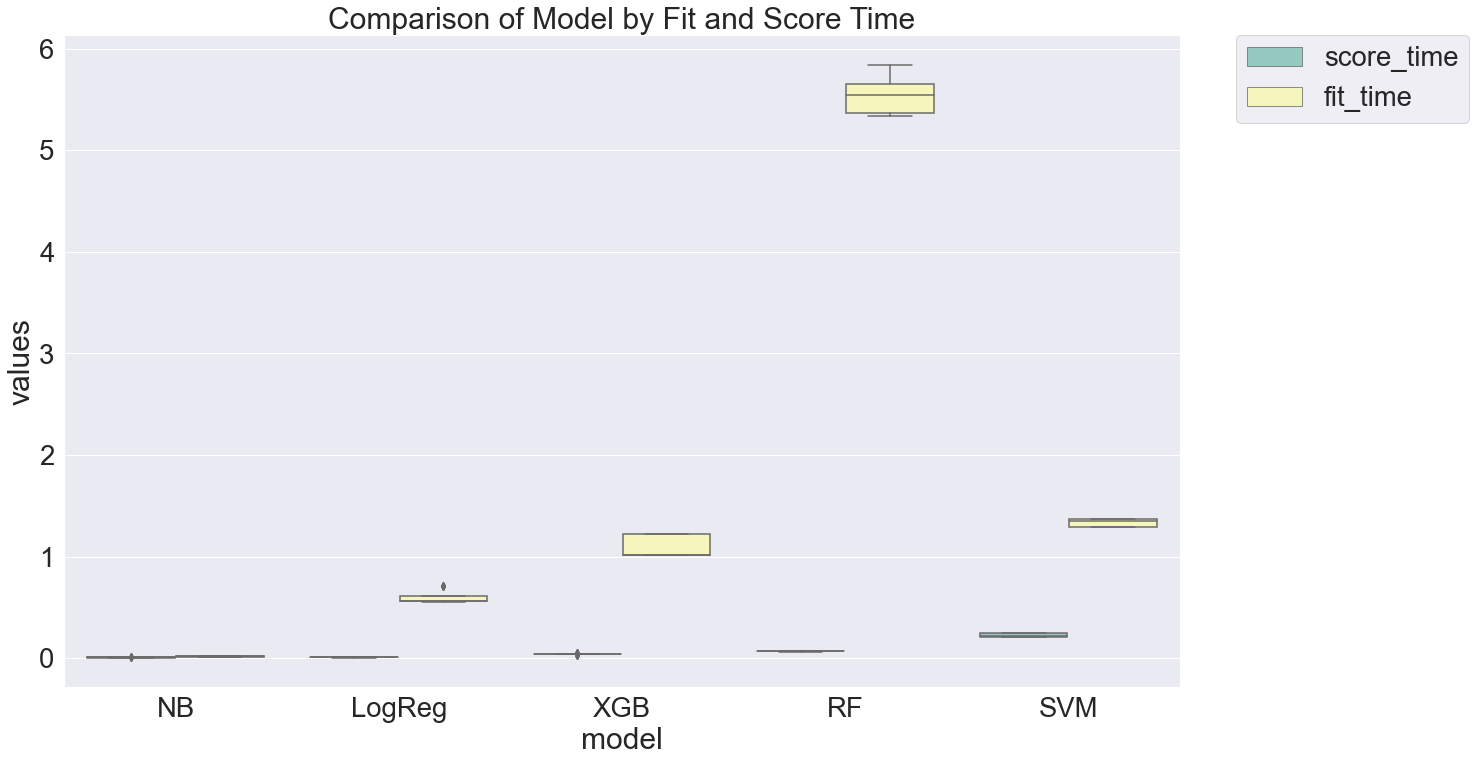

In [87]:
plt.figure(figsize=(20, 12))
sns.set(font_scale=2.5)
g = sns.boxplot(x="model", y="values", hue="metrics", data=results_long_fit, palette="Set3")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Comparison of Model by Fit and Score Time')
#plt.savefig('./benchmark_models_time.png',dpi=300)

In [88]:
metrics = list(set(results_long_nofit.metrics.values))
bootstrap_df.groupby(['model'])[metrics].agg([np.mean,np.std])

test_accuracy           test_f1_macro          
                mean       std          mean       std
model                                                 
LogReg      0.834833  0.005061      0.834348  0.005189
NB          0.726250  0.016498      0.721812  0.015959
RF          0.829167  0.009170      0.827918  0.008342
SVM         0.782125  0.011036      0.782333  0.011916
XGB         0.841000  0.008986      0.839571  0.007795

In [89]:
time_metrics = list(set(results_long_fit.metrics.values))
bootstrap_df.groupby(['model'])[time_metrics].agg([np.mean,np.std])

score_time            fit_time          
             mean       std      mean       std
model                                          
LogReg   0.009602  0.001936  0.599415  0.057730
NB       0.007146  0.002580  0.016430  0.004653
RF       0.067722  0.003131  5.549252  0.192315
SVM      0.226726  0.016425  1.338805  0.033853
XGB      0.039568  0.005105  1.088982  0.093533

### The following are 3 TF-IDF methods

#### word level tf-idf

In [90]:
# word level tf-idf
tfidf_vect = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', max_features=5000)
tfidf_vect.fit(feature_df['cleaned_text'])
xtrain_tfidf =  tfidf_vect.transform(x_train)
xvalid_tfidf =  tfidf_vect.transform(x_test)

In [91]:
# Model building for word level tf-idf


dfs = []
models = [
        ('LogReg', LogisticRegression()), 
        ('RF', RandomForestClassifier()),
        #('KNN', KNeighborsClassifier()),
        ('SVM', SVC()), 
        ('NB', MultinomialNB()),
        ('XGB', XGBClassifier())
        ]
results = []
names = []
scoring = ['accuracy','f1_macro']
target_names = ['Poor', 'Neutral','Good']

            
        
for name, model in models:
    kfold = model_selection.KFold(n_splits=5, shuffle=True, random_state=123)
    cv_results = model_selection.cross_validate(model, xtrain_tfidf, y_train, cv=kfold, scoring=scoring)
    clf = model.fit(xtrain_tfidf, y_train)
    y_pred = clf.predict(xvalid_tfidf)
    print(name)
    print(classification_report(y_test, y_pred, target_names=target_names,digits=4))

    results.append(cv_results)
    names.append(name)

    this_df = pd.DataFrame(cv_results)
    this_df['model'] = name
    dfs.append(this_df)
    final = pd.concat(dfs, ignore_index=True)
#return final
            


LogReg
              precision    recall  f1-score   support

        Poor     0.9526    0.7675    0.8501       314
     Neutral     0.7085    0.8979    0.7921       333
        Good     0.8154    0.7507    0.7817       353

    accuracy                         0.8050      1000
   macro avg     0.8255    0.8054    0.8080      1000
weighted avg     0.8229    0.8050    0.8066      1000

RF
              precision    recall  f1-score   support

        Poor     0.9091    0.8280    0.8667       314
     Neutral     0.7469    0.8949    0.8142       333
        Good     0.8190    0.7309    0.7725       353

    accuracy                         0.8160      1000
   macro avg     0.8250    0.8179    0.8178      1000
weighted avg     0.8233    0.8160    0.8159      1000

SVM
              precision    recall  f1-score   support

        Poor     0.9620    0.7261    0.8276       314
     Neutral     0.6623    0.9129    0.7677       333
        Good     0.8191    0.7054    0.7580       353

    ac

In [92]:
final

,fit_time,score_time,test_accuracy,test_f1_macro,model
0,0.592494,0.010041,0.80750,0.807525,LogReg
1,0.471137,0.002050,0.81500,0.816775,LogReg
2,0.442350,0.010098,0.79750,0.799862,LogReg
3,0.379911,0.002016,0.79125,0.790440,LogReg
4,0.303210,0.010050,0.81000,0.809120,LogReg
5,4.979836,0.081610,0.82625,0.821337,RF
6,4.829431,0.062756,0.83250,0.833506,RF
7,4.861778,0.062766,0.82875,0.828668,RF
8,5.086537,0.086735,0.81375,0.810770,RF
9,5.056385,0.060603,0.82125,0.820346,RF


In [93]:
bootstraps = []
for model in list(set(final.model.values)):
    model_df = final.loc[final.model == model]
    bootstrap = model_df.sample(n=30, replace=True)
    bootstraps.append(bootstrap)
        
bootstrap_df = pd.concat(bootstraps, ignore_index=True)
results_long = pd.melt(bootstrap_df,id_vars=['model'],var_name='metrics', value_name='values')
time_metrics = ['fit_time','score_time'] # fit time metrics
## PERFORMANCE METRICS
results_long_nofit = results_long.loc[~results_long['metrics'].isin(time_metrics)] # get df without fit data
results_long_nofit = results_long_nofit.sort_values(by='values')
## TIME METRICS
results_long_fit = results_long.loc[results_long['metrics'].isin(time_metrics)] # df with fit data
results_long_fit = results_long_fit.sort_values(by='values')

Text(0.5, 1.0, 'Comparison of Model by Classification Metric')

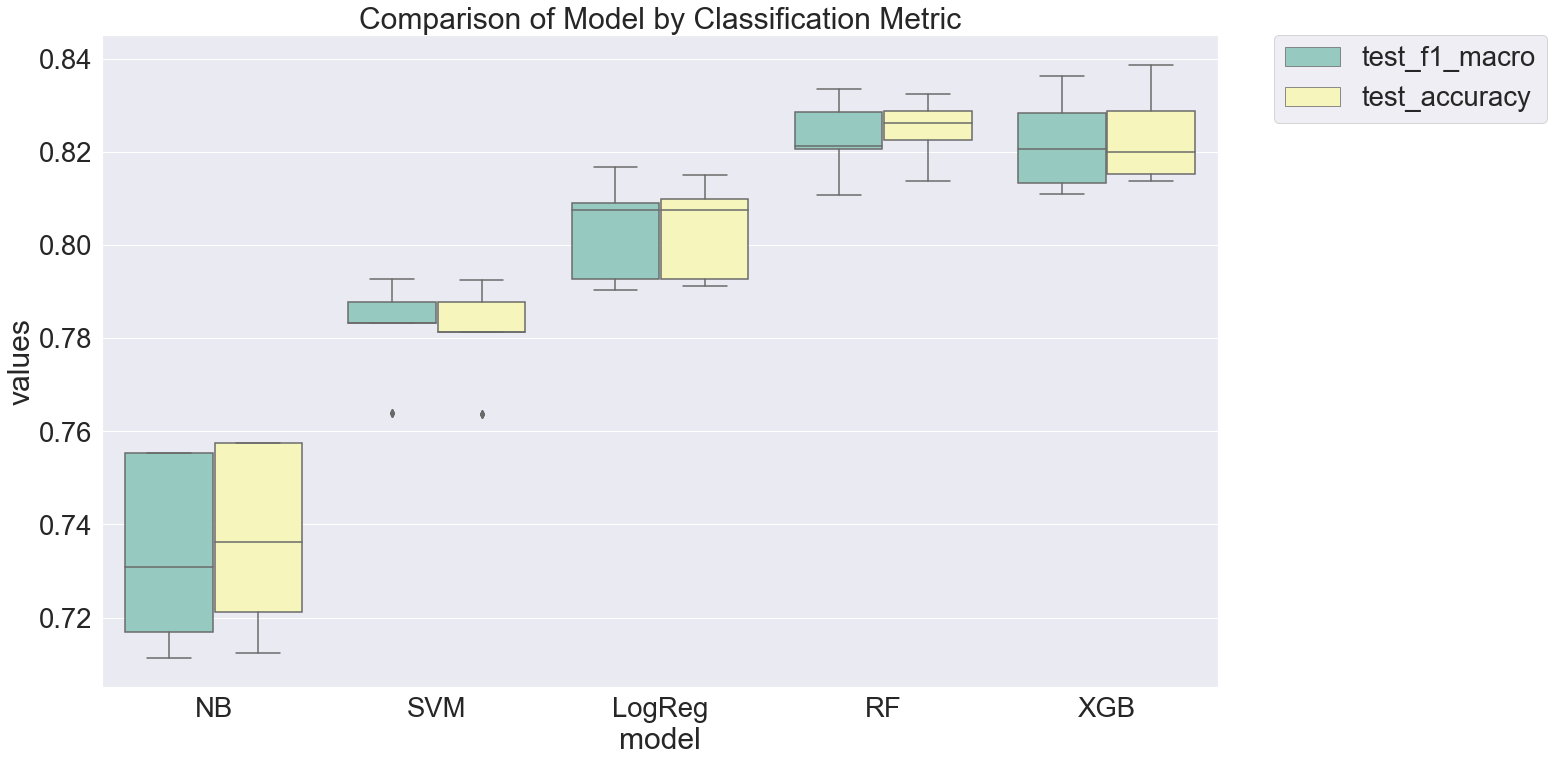

In [94]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(20, 12))
sns.set(font_scale=2.5)
g = sns.boxplot(x="model", y="values", hue="metrics", data=results_long_nofit, palette="Set3")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Comparison of Model by Classification Metric')
#plt.savefig('./benchmark_models_performance.png',dpi=300)

Text(0.5, 1.0, 'Comparison of Model by Fit and Score Time')

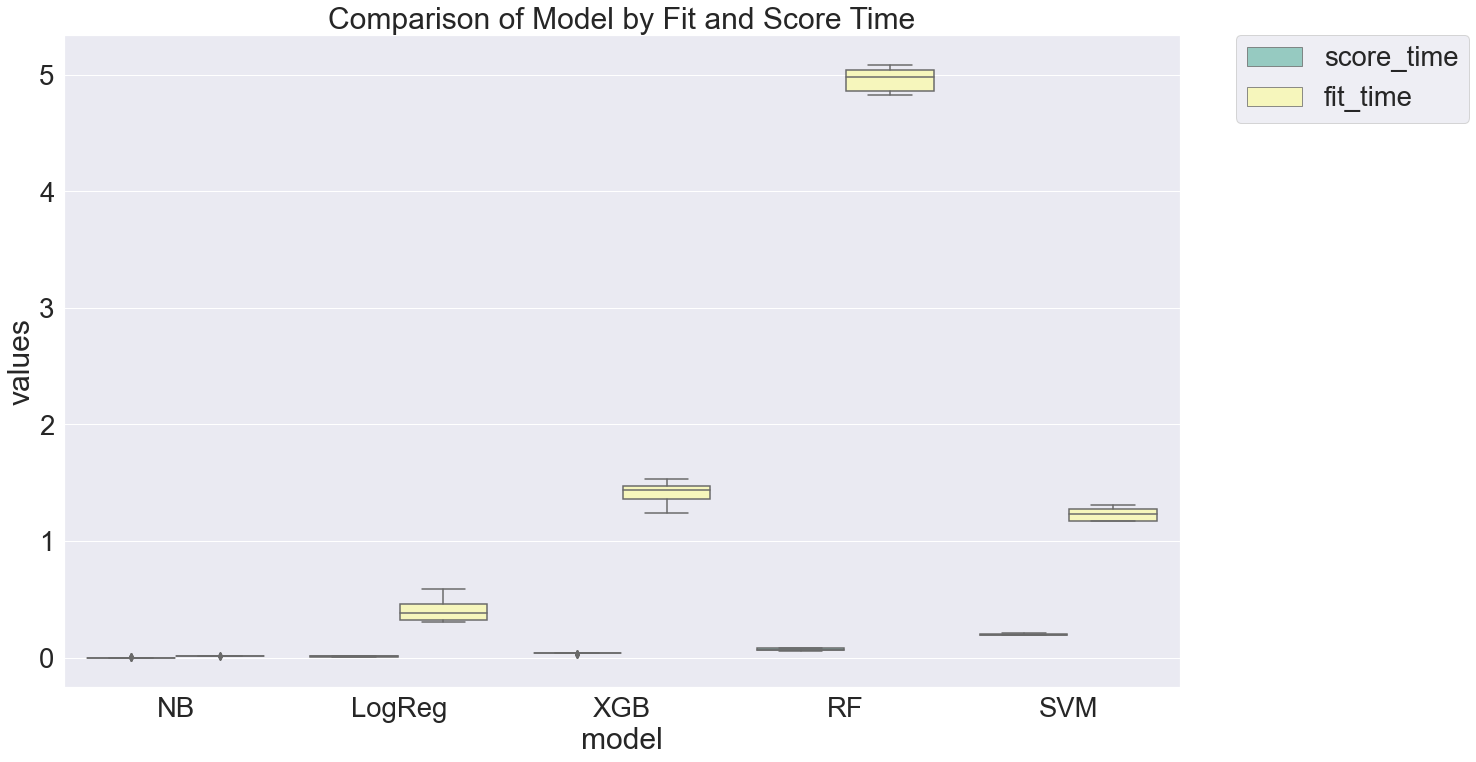

In [95]:
plt.figure(figsize=(20, 12))
sns.set(font_scale=2.5)
g = sns.boxplot(x="model", y="values", hue="metrics", data=results_long_fit, palette="Set3")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Comparison of Model by Fit and Score Time')
#plt.savefig('./benchmark_models_time.png',dpi=300)

In [96]:
metrics = list(set(results_long_nofit.metrics.values))
bootstrap_df.groupby(['model'])[metrics].agg([np.mean,np.std])

test_accuracy           test_f1_macro          
                mean       std          mean       std
model                                                 
LogReg      0.802083  0.008176      0.802170  0.008165
NB          0.736000  0.017897      0.732561  0.018464
RF          0.825458  0.006659      0.823707  0.008129
SVM         0.781083  0.009084      0.782273  0.009090
XGB         0.822250  0.007771      0.821374  0.008034

In [97]:
time_metrics = list(set(results_long_fit.metrics.values))
bootstrap_df.groupby(['model'])[time_metrics].agg([np.mean,np.std])

score_time            fit_time          
             mean       std      mean       std
model                                          
LogReg   0.007648  0.003748  0.424589  0.107517
NB       0.000832  0.001661  0.010519  0.000907
RF       0.072438  0.010971  4.943638  0.101138
SVM      0.199301  0.009368  1.230027  0.051286
XGB      0.039468  0.002463  1.429878  0.086299

#### ngram level tf-idf 

In [98]:

# ngram level tf-idf 
tfidf_vect_ngram = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', ngram_range=(2,3), max_features=5000)
tfidf_vect_ngram.fit(feature_df['cleaned_text'])
xtrain_tfidf_ngram =  tfidf_vect_ngram.transform(x_train)
xvalid_tfidf_ngram =  tfidf_vect_ngram.transform(x_test)



In [99]:
# Model building for ngram level tf-idf


dfs = []
models = [
        ('LogReg', LogisticRegression()), 
        ('RF', RandomForestClassifier()),
        #('KNN', KNeighborsClassifier()),
        ('SVM', SVC()), 
        ('NB', MultinomialNB()),
        ('XGB', XGBClassifier())
        ]
results = []
names = []
scoring = ['accuracy','f1_macro']
target_names = ['Poor', 'Neutral','Good']

            
        
for name, model in models:
    kfold = model_selection.KFold(n_splits=5, shuffle=True, random_state=123)
    cv_results = model_selection.cross_validate(model, xtrain_tfidf_ngram, y_train, cv=kfold, scoring=scoring)
    clf = model.fit(xtrain_tfidf_ngram, y_train)
    y_pred = clf.predict(xvalid_tfidf_ngram)
    print(name)
    print(classification_report(y_test, y_pred, target_names=target_names,digits=4))

    results.append(cv_results)
    names.append(name)

    this_df = pd.DataFrame(cv_results)
    this_df['model'] = name
    dfs.append(this_df)
    final = pd.concat(dfs, ignore_index=True)
#return final
            


LogReg
              precision    recall  f1-score   support

        Poor     0.8024    0.4268    0.5572       314
     Neutral     0.4418    0.8769    0.5875       333
        Good     0.7442    0.3626    0.4876       353

    accuracy                         0.5540      1000
   macro avg     0.6628    0.5554    0.5441      1000
weighted avg     0.6618    0.5540    0.5427      1000

RF
              precision    recall  f1-score   support

        Poor     0.8231    0.3854    0.5249       314
     Neutral     0.4332    0.9159    0.5882       333
        Good     0.7517    0.3173    0.4462       353

    accuracy                         0.5380      1000
   macro avg     0.6693    0.5395    0.5198      1000
weighted avg     0.6681    0.5380    0.5182      1000

SVM
              precision    recall  f1-score   support

        Poor     0.4814    0.7420    0.5840       314
     Neutral     0.5645    0.4204    0.4819       333
        Good     0.6567    0.4986    0.5668       353

    ac

In [100]:
final

,fit_time,score_time,test_accuracy,test_f1_macro,model
0,0.831818,0.012571,0.56500,0.541855,LogReg
1,0.757844,0.008018,0.53625,0.514677,LogReg
2,0.922505,0.007566,0.57125,0.554682,LogReg
3,1.081834,0.005983,0.53500,0.516281,LogReg
4,0.819253,0.000998,0.57625,0.565984,LogReg
5,23.338609,0.272748,0.54625,0.511941,RF
6,22.275403,0.263181,0.53000,0.503855,RF
7,21.243831,0.275576,0.54375,0.515916,RF
8,21.934061,0.266978,0.51750,0.489032,RF
9,22.256292,0.256831,0.55750,0.535739,RF


In [101]:
bootstraps = []
for model in list(set(final.model.values)):
    model_df = final.loc[final.model == model]
    bootstrap = model_df.sample(n=30, replace=True)
    bootstraps.append(bootstrap)
        
bootstrap_df = pd.concat(bootstraps, ignore_index=True)
results_long = pd.melt(bootstrap_df,id_vars=['model'],var_name='metrics', value_name='values')
time_metrics = ['fit_time','score_time'] # fit time metrics
## PERFORMANCE METRICS
results_long_nofit = results_long.loc[~results_long['metrics'].isin(time_metrics)] # get df without fit data
results_long_nofit = results_long_nofit.sort_values(by='values')
## TIME METRICS
results_long_fit = results_long.loc[results_long['metrics'].isin(time_metrics)] # df with fit data
results_long_fit = results_long_fit.sort_values(by='values')

Text(0.5, 1.0, 'Comparison of Model by Classification Metric')

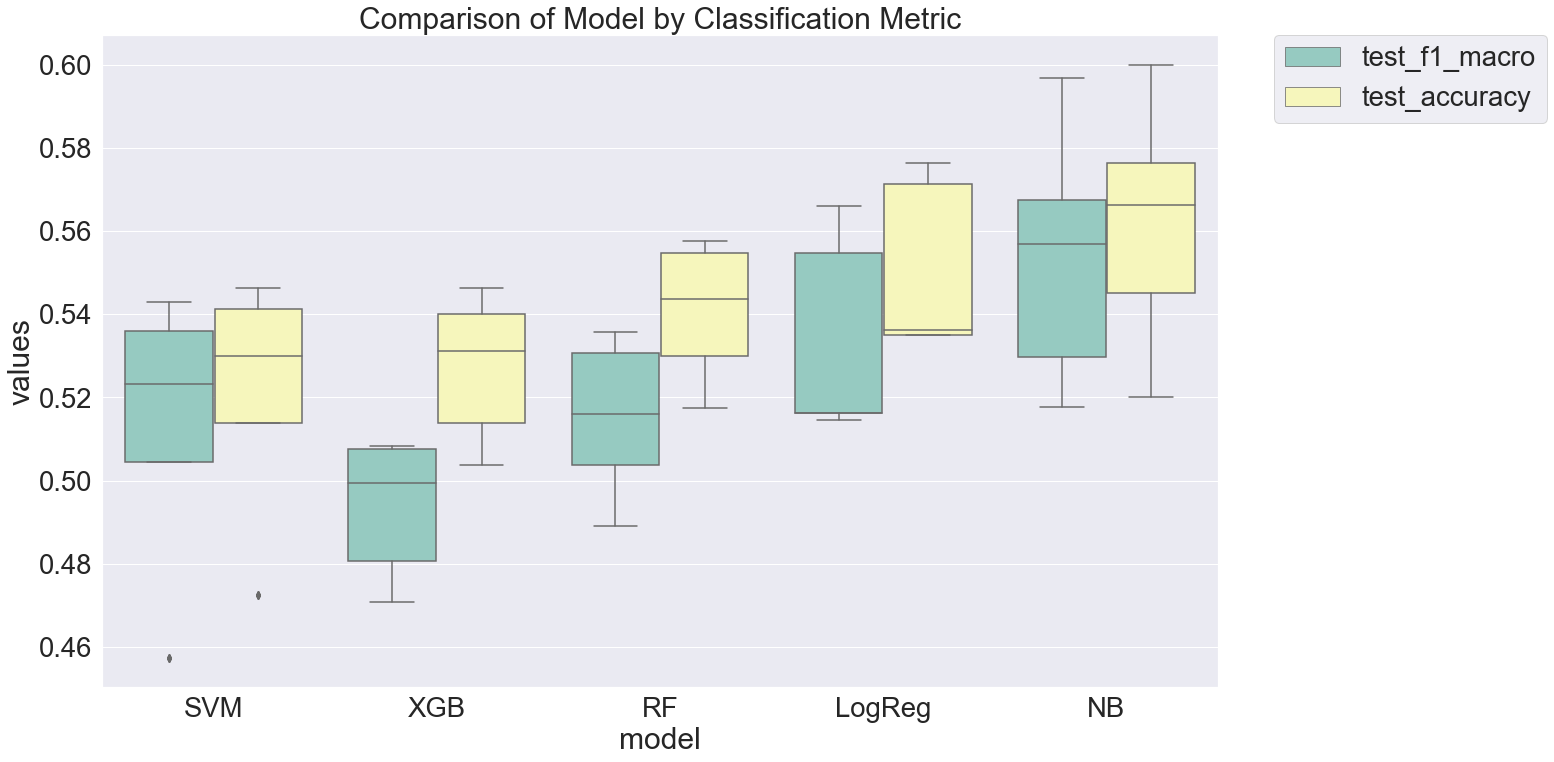

In [102]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(20, 12))
sns.set(font_scale=2.5)
g = sns.boxplot(x="model", y="values", hue="metrics", data=results_long_nofit, palette="Set3")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Comparison of Model by Classification Metric')
#plt.savefig('./benchmark_models_performance.png',dpi=300)

Text(0.5, 1.0, 'Comparison of Model by Fit and Score Time')

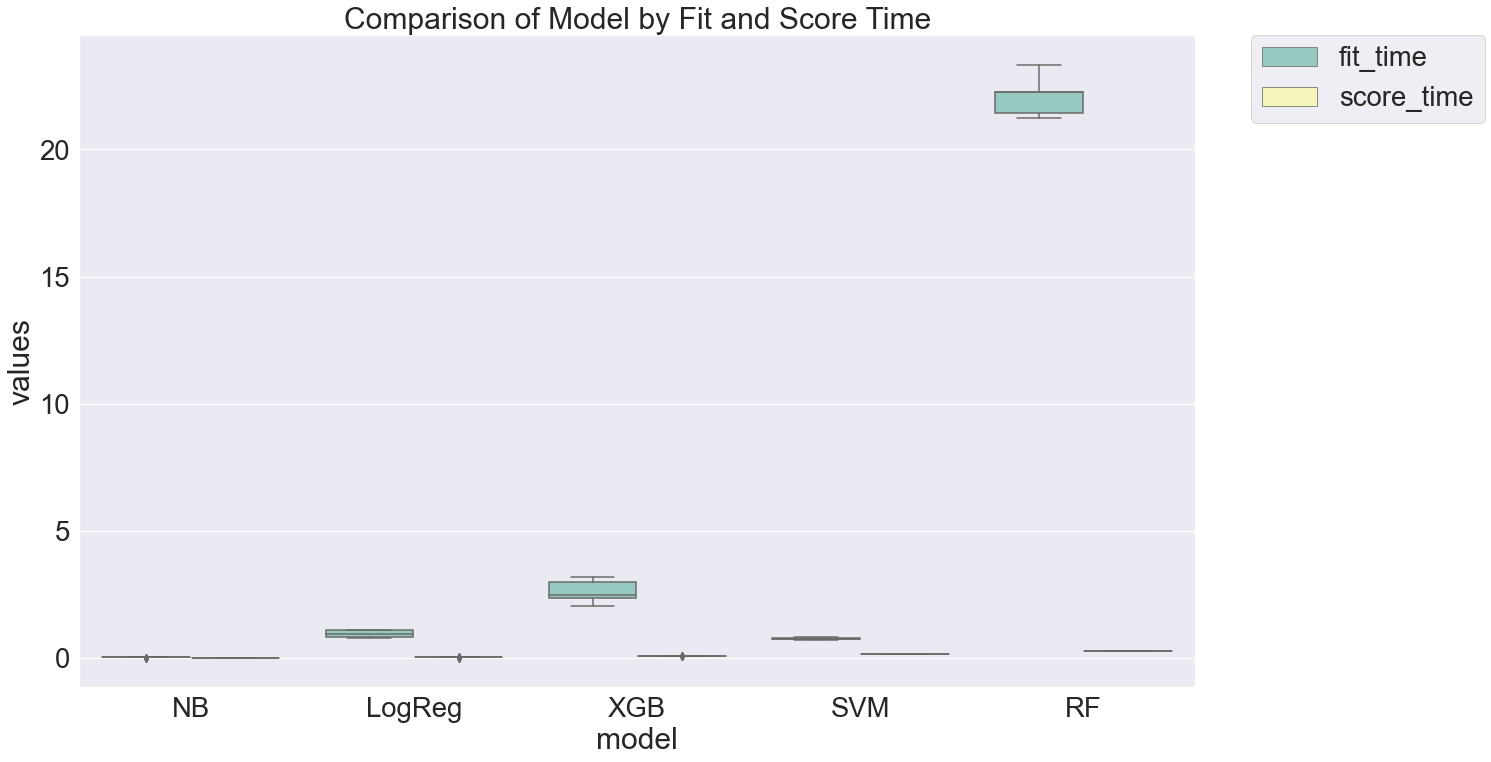

In [103]:
plt.figure(figsize=(20, 12))
sns.set(font_scale=2.5)
g = sns.boxplot(x="model", y="values", hue="metrics", data=results_long_fit, palette="Set3")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Comparison of Model by Fit and Score Time')
#plt.savefig('./benchmark_models_time.png',dpi=300)

In [104]:
metrics = list(set(results_long_nofit.metrics.values))
bootstrap_df.groupby(['model'])[metrics].agg([np.mean,np.std])

test_accuracy           test_f1_macro          
                mean       std          mean       std
model                                                 
LogReg      0.552000  0.018223      0.533677  0.020579
NB          0.564292  0.023311      0.555357  0.025165
RF          0.542042  0.013336      0.514945  0.015327
SVM         0.521667  0.027589      0.513943  0.031802
XGB         0.526500  0.016339      0.492673  0.015325

In [105]:
time_metrics = list(set(results_long_fit.metrics.values))
bootstrap_df.groupby(['model'])[time_metrics].agg([np.mean,np.std])

score_time             fit_time          
             mean       std       mean       std
model                                           
LogReg   0.006920  0.003143   0.916824  0.130134
NB       0.000000  0.000000   0.012090  0.006391
RF       0.266894  0.007551  22.126910  0.694129
SVM      0.139346  0.006018   0.757665  0.039115
XGB      0.051463  0.003720   2.640248  0.420774

#### characters level tf-idf

In [106]:
# characters level tf-idf
tfidf_vect_ngram_chars = TfidfVectorizer(analyzer='char', token_pattern=r'\w{1,}', ngram_range=(2,3), max_features=5000)
tfidf_vect_ngram_chars.fit(feature_df['cleaned_text'])
xtrain_tfidf_ngram_chars =  tfidf_vect_ngram_chars.transform(x_train) 
xvalid_tfidf_ngram_chars =  tfidf_vect_ngram_chars.transform(x_test)

In [107]:
# Model building for char level tf-idf


dfs = []
models = [
        ('LogReg', LogisticRegression()), 
        ('RF', RandomForestClassifier()),
        #('KNN', KNeighborsClassifier()),
        ('SVM', SVC()), 
        ('NB', MultinomialNB()),
        ('XGB', XGBClassifier())
        ]
results = []
names = []
scoring = ['accuracy','f1_macro']
target_names = ['Poor', 'Neutral','Good']

            
        
for name, model in models:
    kfold = model_selection.KFold(n_splits=5, shuffle=True, random_state=123)
    cv_results = model_selection.cross_validate(model, xtrain_tfidf_ngram_chars, y_train, cv=kfold, scoring=scoring)
    clf = model.fit(xtrain_tfidf_ngram_chars, y_train)
    y_pred = clf.predict(xvalid_tfidf_ngram_chars)
    print(name)
    print(classification_report(y_test, y_pred, target_names=target_names,digits=4))

    results.append(cv_results)
    names.append(name)

    this_df = pd.DataFrame(cv_results)
    this_df['model'] = name
    dfs.append(this_df)
    final = pd.concat(dfs, ignore_index=True)
#return final
            


LogReg
              precision    recall  f1-score   support

        Poor     0.8522    0.7898    0.8198       314
     Neutral     0.7235    0.8408    0.7778       333
        Good     0.7764    0.7082    0.7407       353

    accuracy                         0.7780      1000
   macro avg     0.7840    0.7796    0.7795      1000
weighted avg     0.7826    0.7780    0.7779      1000

RF
              precision    recall  f1-score   support

        Poor     0.8103    0.7484    0.7781       314
     Neutral     0.6797    0.8348    0.7493       333
        Good     0.7276    0.6204    0.6697       353

    accuracy                         0.7320      1000
   macro avg     0.7392    0.7345    0.7324      1000
weighted avg     0.7376    0.7320    0.7303      1000

SVM
              precision    recall  f1-score   support

        Poor     0.8889    0.7643    0.8219       314
     Neutral     0.6938    0.8709    0.7723       333
        Good     0.7981    0.7054    0.7489       353

    ac

In [108]:
final

,fit_time,score_time,test_accuracy,test_f1_macro,model
0,0.610541,0.010026,0.75125,0.749132,LogReg
1,0.948210,0.007519,0.74750,0.747778,LogReg
2,0.464128,0.006936,0.74125,0.741635,LogReg
3,0.920508,0.010043,0.76500,0.764290,LogReg
4,1.012033,0.010924,0.73625,0.736005,LogReg
5,3.723387,0.049031,0.73375,0.731637,RF
6,3.223255,0.048547,0.72625,0.726307,RF
7,3.401191,0.051061,0.73375,0.733342,RF
8,3.173620,0.048431,0.72000,0.717723,RF
9,3.285298,0.058507,0.70250,0.699945,RF


In [109]:
bootstraps = []
for model in list(set(final.model.values)):
    model_df = final.loc[final.model == model]
    bootstrap = model_df.sample(n=30, replace=True)
    bootstraps.append(bootstrap)
        
bootstrap_df = pd.concat(bootstraps, ignore_index=True)
results_long = pd.melt(bootstrap_df,id_vars=['model'],var_name='metrics', value_name='values')
time_metrics = ['fit_time','score_time'] # fit time metrics
## PERFORMANCE METRICS
results_long_nofit = results_long.loc[~results_long['metrics'].isin(time_metrics)] # get df without fit data
results_long_nofit = results_long_nofit.sort_values(by='values')
## TIME METRICS
results_long_fit = results_long.loc[results_long['metrics'].isin(time_metrics)] # df with fit data
results_long_fit = results_long_fit.sort_values(by='values')

Text(0.5, 1.0, 'Comparison of Model by Classification Metric')

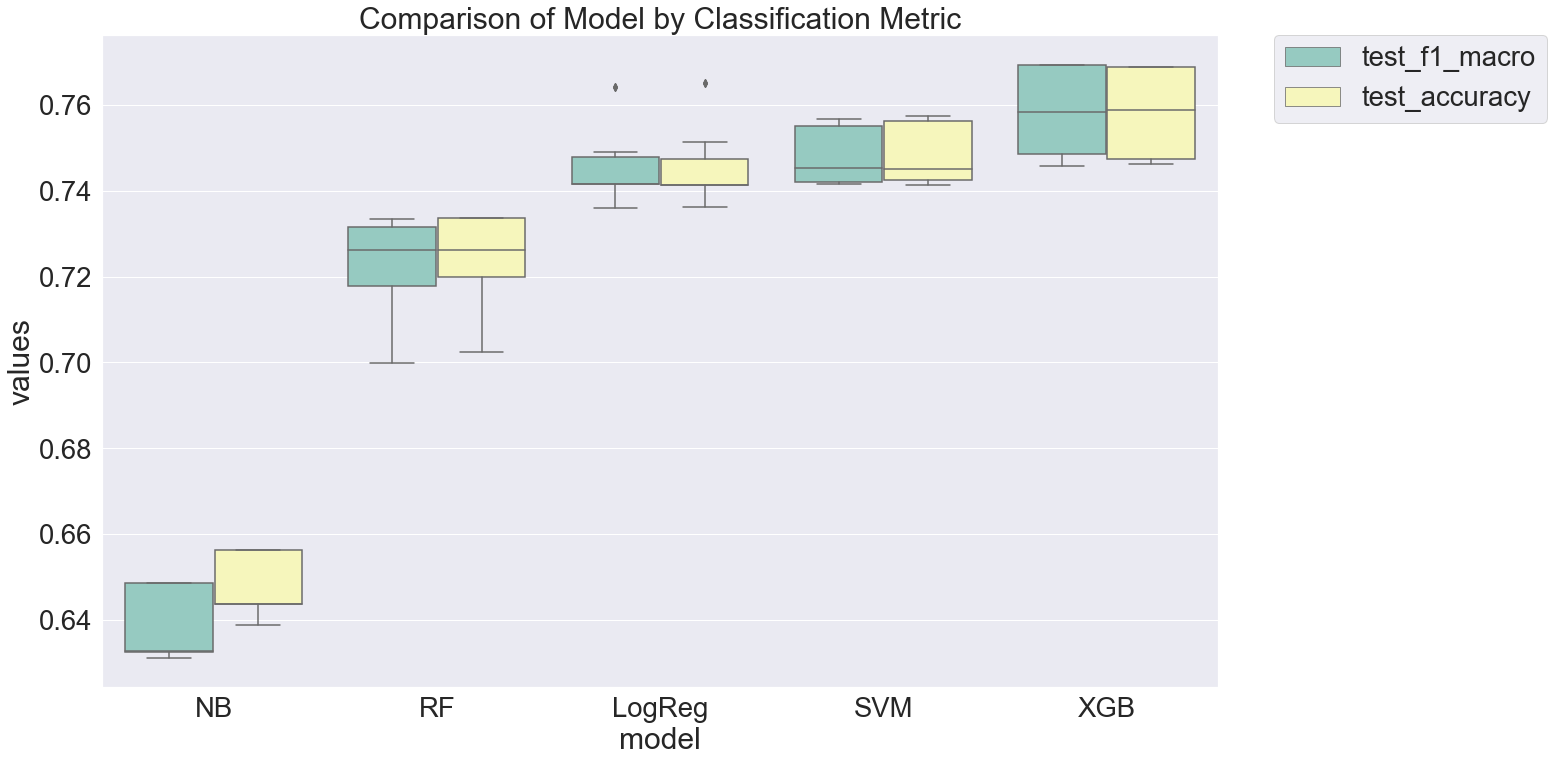

In [110]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(20, 12))
sns.set(font_scale=2.5)
g = sns.boxplot(x="model", y="values", hue="metrics", data=results_long_nofit, palette="Set3")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Comparison of Model by Classification Metric')
#plt.savefig('./benchmark_models_performance.png',dpi=300)

Text(0.5, 1.0, 'Comparison of Model by Fit and Score Time')

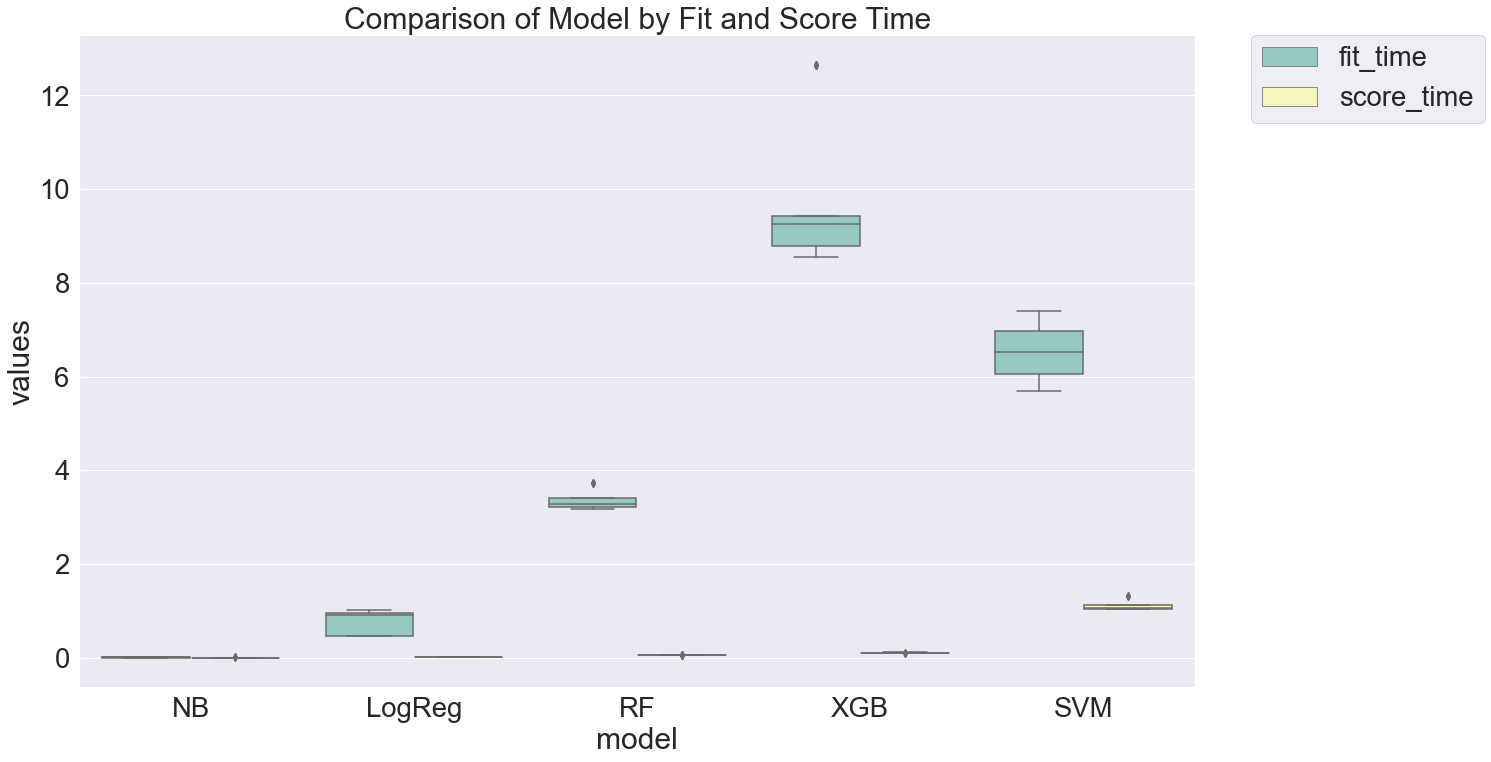

In [111]:
plt.figure(figsize=(20, 12))
sns.set(font_scale=2.5)
g = sns.boxplot(x="model", y="values", hue="metrics", data=results_long_fit, palette="Set3")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Comparison of Model by Fit and Score Time')
#plt.savefig('./benchmark_models_time.png',dpi=300)

In [112]:
metrics = list(set(results_long_nofit.metrics.values))
bootstrap_df.groupby(['model'])[metrics].agg([np.mean,np.std])

test_accuracy           test_f1_macro          
                mean       std          mean       std
model                                                 
LogReg      0.745292  0.008231      0.745163  0.007938
NB          0.648333  0.007284      0.639508  0.007862
RF          0.721958  0.012024      0.720557  0.012765
SVM         0.747792  0.006709      0.747340  0.006262
XGB         0.757417  0.009388      0.757515  0.009376

In [113]:
time_metrics = list(set(results_long_fit.metrics.values))
bootstrap_df.groupby(['model'])[time_metrics].agg([np.mean,np.std])

score_time            fit_time          
             mean       std      mean       std
model                                          
LogReg   0.008509  0.001677  0.763077  0.240970
NB       0.001563  0.004769  0.009405  0.007105
RF       0.051415  0.004096  3.330076  0.175175
SVM      1.097783  0.082288  6.445750  0.541364
XGB      0.103737  0.005540  9.741695  1.518412